In [1]:
import matplotlib.pyplot as plt
import ast

In [2]:
from utils.data_initial import *
from utils.freebase import *
from utils.data_generated import *
from utils.data_processing import *

# Ethnicity data

In [3]:
df_cmu_char_md = load_cmu_character_metadata()

In [4]:
ethnicities = df_cmu_char_md.actor_ethnicity.dropna()

In [5]:
ethnicities_map = load_ethnicities()

In [6]:
ethnicities_dict = {key: val for key, val in zip(ethnicities_map.freebase_id, ethnicities_map.ethnicity)}

In [7]:
ethnicities_mapped = ethnicities.map(ethnicities_dict).dropna()

In [8]:
n_ethnicities = len(list(ethnicities.unique()))

print("There are {} different etnicities in our dataset.".format(n_ethnicities))

There are 479 different etnicities in our dataset.


In [9]:
mapped = ethnicities_map.dropna()

print("We managed to retrieve {} ethnicity values from freebase.".format(len(mapped)))

We managed to retrieve 430 ethnicity values from freebase.


In [10]:
n_actors = len(ethnicities)

print("There are {} actors with specified ethnicites in our dataset.".format(n_actors))

There are 106058 actors with specified ethnicites in our dataset.


In [11]:
ethnicities_vcount = pd.DataFrame(ethnicities_mapped.value_counts())
ethnicities_vcount.columns = ['occurences']

In [12]:
n_remaining = ethnicities_vcount.agg('sum').values[0]
print("We would loose {} ethnicites amongst them after mapping to their values.".format(n_actors - n_remaining))

We would loose 3161 ethnicites amongst them after mapping to their values.


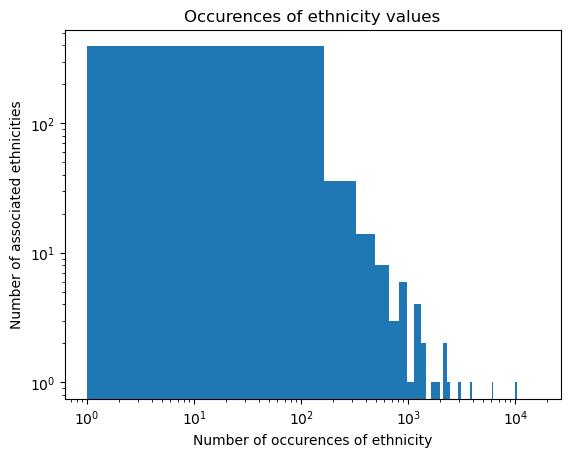

In [13]:
plt.hist(ethnicities.value_counts(), bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of ethnicity values")
plt.xlabel('Number of occurences of ethnicity')
plt.ylabel('Number of associated ethnicities')
plt.show()

Most of the ethnicities occur less than 100 times in our dataset.

In [14]:
ethnicities_vcount.describe()

,occurences
count,429.000000
mean,239.853147
std,1136.483955
min,1.000000
25%,6.000000
50%,23.000000
75%,109.000000
max,16351.000000


In [15]:
n_m10 = len(ethnicities_vcount[ethnicities_vcount.occurences > 10])
n_m100 = len(ethnicities_vcount[ethnicities_vcount.occurences > 100])
print("If we only keep those occuring more than 10 times we would have {} left, and for more than 100 times {} left.".format(n_m10, n_m100))

If we only keep those occuring more than 10 times we would have 286 left, and for more than 100 times 114 left.


The top 15 occuring ethnicities are:

In [16]:
ethnicities_vcount.head(15)

,occurences
Indians,16351
African Americans,10159
Jewish people,10121
English people,6165
Irish Americans,3857
Italian Americans,2956
white people,2307
white Americans,2250
Scottish American,2223
Irish people,1637


Ethnicities occuring at most 10 times are for example:

In [17]:
ethnicities_vcount[ethnicities_vcount.occurences < 10].sample(10)

,occurences
Malagasy people,1
Danish Canadians,3
Greek Australian,1
Manx people,5
Peruvians in the United Kingdom,8
Uruguayans,9
Indian diaspora,1
Sherpa,1
Hutsuls,1
Indo-Guyanese,3


Ethnicities occuring between 50 and 100 times are for exapmle:

In [18]:
ethnicities_vcount[(ethnicities_vcount.occurences < 100) & (ethnicities_vcount.occurences > 90)]

,occurences
Native Hawaiians,96
Irish Canadians,95
Pakistanis,94
Lebanese American,91


Here are some examples illustrating the granularity of the data:

In [19]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Japan')]

,occurences
Japanese,649
Japanese American,278
Japanese Brazilians,3


In [20]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Asia')]

,occurences
Asian Americans,224
Asian people,103
British Asian,7


In [21]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('Africa')]

,occurences
African Americans,10159
White Africans of European ancestry,45
history of the Jews in the African diaspora,33
South African American,24
African people,16
White South Africans,5
Greeks in South Africa,2
British African Caribbean people,1


We also notice that their might be some additionnal data cleaning to be done, for example:

In [22]:
ethnicities_vcount[ethnicities_vcount.index.str.contains('history')]

,occurences
history of the Jews in the African diaspora,33
history of the Jews in India,28


## Genres

In [23]:
df_movie_md = load_cmu_movie_metadata()

In [24]:
print("There are {} movies in our database.".format(len(df_movie_md)))

There are 81741 movies in our database.


In [25]:
genres = df_movie_md.genres.dropna()

In [26]:
print("Amongst those, {} have their genre specified.".format(len(genres)))

Amongst those, 81741 have their genre specified.


In [27]:
data = [item for sublist in [cmu_dict_to_list(dct) for dct in genres] for item in sublist]
all_genres = pd.DataFrame(data, columns=['genre'])

In [28]:
n_genres = len(all_genres.genre.unique())

print("There are {} different genres.".format(n_genres))

There are 363 different genres.


In [29]:
all_genres_vcount = pd.DataFrame(all_genres.value_counts())
all_genres_vcount.columns = ['occurences']

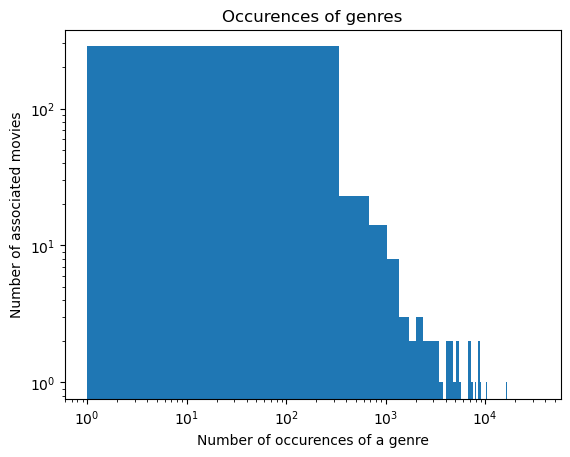

In [30]:
plt.hist(all_genres.value_counts(), bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Most genres occur less than 100 times in our dataset.

In [31]:
all_genres_vcount.describe()

,occurences
count,363.000000
mean,670.327824
std,2424.819001
min,1.000000
25%,13.000000
50%,65.000000
75%,283.500000
max,34007.000000


In [32]:
n_m10 = len(all_genres_vcount[all_genres_vcount.occurences > 10])
n_m100 = len(all_genres_vcount[all_genres_vcount.occurences > 100])
print("If we only keep those occuring more than 10 times we would have {} left, and for more than 100 times {} left.".format(n_m10, n_m100))

If we only keep those occuring more than 10 times we would have 276 left, and for more than 100 times 151 left.


Some genres occuring at most 10 times are:

In [33]:
all_genres_vcount[all_genres_vcount.occurences < 10].sample(10)

,occurences
genre,
Early Black Cinema,8
Science fiction Western,6
Latino,6
The Netherlands in World War II,2
Demonic child,6
Romantic thriller,1
Supermarionation,3
Roadshow/Carny,5
Ninja movie,2


The 15 most occuring genres are:

In [34]:
all_genres_vcount.head(15)

,occurences
genre,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
Thriller,8744
Short Film,8141
World cinema,7155
Crime Fiction,6948


### Through time

In [35]:
genres_by_year = df_movie_md[['release_date', 'genres']]

In [36]:
genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
genres_by_year.genres = genres_by_year.genres.apply(lambda g: cmu_dict_to_list(g))
genres_by_year = genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.release_date.value_counts().sort_index())

/tmp/ipykernel_9717/242782437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
/tmp/ipykernel_9717/242782437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.genres = genres_by_year.genres.apply(lambda g: cmu_dict_to_list(g))


In [37]:
top_genres = [g[0] for g in list(all_genres_vcount.iloc[:5].index)]

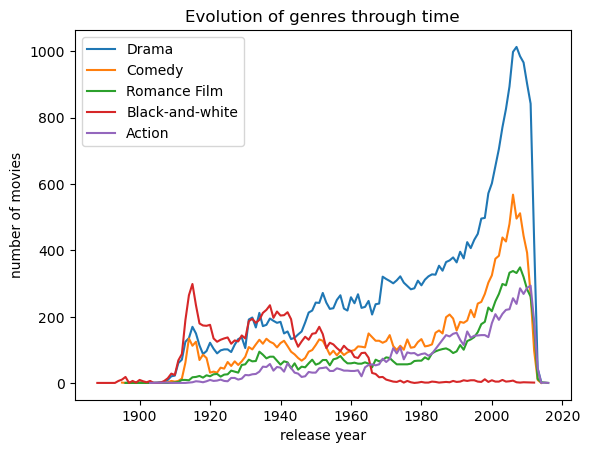

In [38]:
for genre in top_genres:
    genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

As we can see above, even in a basic plot we can see a clear difference in distribution of genre releases.

We try to normalize by the number of releases in each year.

In [39]:
releases_per_year = df_movie_md.release_date.apply(lambda d: d.year).value_counts()

In [40]:
genres_by_year_normalized = genres_by_year.copy()
genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
genres_by_year_normalized = genres_by_year_normalized.divide(releases_per_year, level=1)

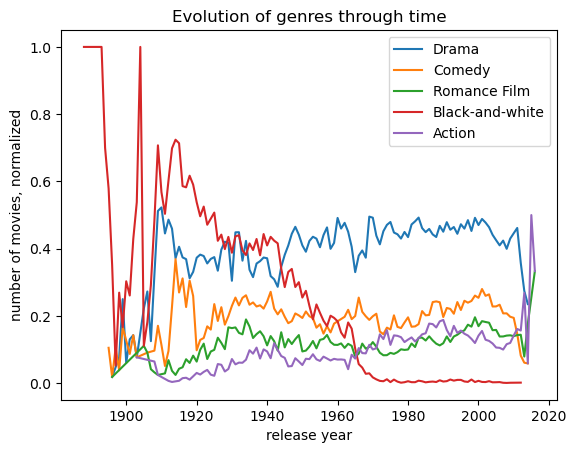

In [41]:
for genre in top_genres:
    genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

### We now consider the imdb dataset

In [42]:
df_imdb = load_imdb_title_basics()

In [43]:
df_imdb

,title_id,type,primary_title,original_title,is_adult,start_year,end_year,runtime_minutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9339868,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,<NA>,<NA>,"Action,Drama,Family"
9339869,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,<NA>,"Action,Drama,Family"
9339870,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,<NA>,"Action,Drama,Family"
9339871,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27,Short


In [44]:
print("There are {} unique movies etc in our database.".format(len(df_imdb.title_id.unique())))

There are 9339873 unique movies etc in our database.


In [45]:
df_imdb = df_imdb[df_imdb.type == 'movie']

In [46]:
print("{} amongst them are classified as movies...".format(len(df_imdb.title_id.unique())))

625933 amongst them are classified as movies...


In [47]:
df_imdb = df_imdb[df_imdb.genres.notnull()]

In [48]:
print("... and {} amongst them have their genres specified.".format(len(df_imdb.title_id.unique())))

... and 553916 amongst them have their genres specified.


In [58]:
data = [item for sublist in [imdb_list_to_list(lst) for lst in df_imdb.genres] for item in sublist]
imdb_all_genres = pd.DataFrame(data, columns=['genre'])

print("The imdb movies dataset contains {} different genres.".format(len(imdb_all_genres.genre.unique())))

The imdb movies dataset contains 28 different genres.


We see that the imdb dataset has a fraction of the genres of the cmu dataset.

In [71]:
imdb_genres_vcount = pd.DataFrame(imdb_all_genres.value_counts())
imdb_genres_vcount.columns = ['occurences']

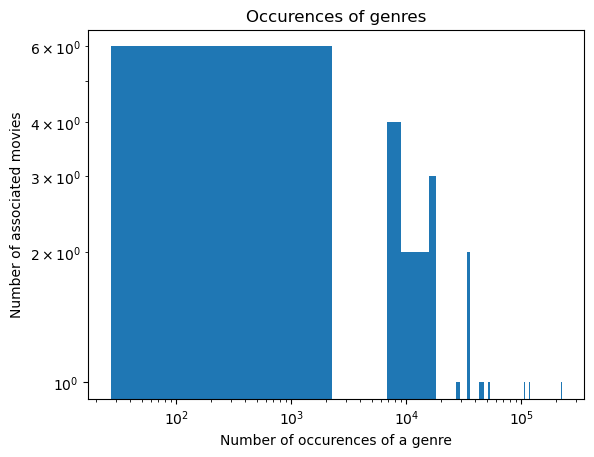

In [72]:
plt.hist(imdb_genres_vcount, bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Due to the small amount of different genres, they all occur very often.

In [74]:
imdb_genres_vcount.describe()

,occurences
count,28.000000
mean,30220.892857
std,47928.299691
min,27.000000
25%,7775.500000
50%,13606.500000
75%,35439.500000
max,225089.000000


In [76]:
imdb_genres_vcount.head(15)

,occurences
genre,
Drama,225089
Documentary,117133
Comedy,106000
Action,52290
Romance,45911
Thriller,42866
Crime,35852
Horror,35302
Adventure,27319


### Through time

In [96]:
imdb_genres_by_year = df_imdb[['start_year', 'genres']]

In [97]:
imdb_genres_by_year.genres = imdb_genres_by_year.genres.apply(lambda g: imdb_list_to_list(g))
imdb_genres_by_year = imdb_genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.start_year.value_counts().sort_index())

/tmp/ipykernel_9717/318387197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_by_year.genres = imdb_genres_by_year.genres.apply(lambda g: imdb_list_to_list(g))


In [98]:
top_genres = [g[0] for g in list(imdb_genres_vcount.iloc[:5].index)]

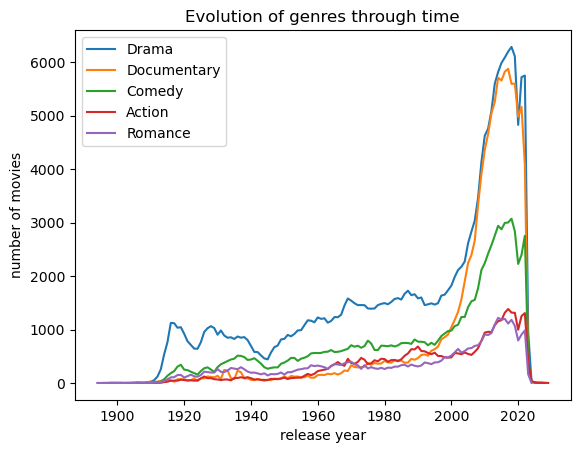

In [100]:
for genre in top_genres:
    imdb_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

There is a difference of evolution of genres visible, as for the cmu dataset.

We also try to normlaized by the number of releases in each year.

In [101]:
releases_per_year = df_imdb.start_year.value_counts()

In [103]:
imdb_genres_by_year_normalized = imdb_genres_by_year.copy()
imdb_genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
imdb_genres_by_year_normalized = imdb_genres_by_year_normalized.divide(releases_per_year, level=1)

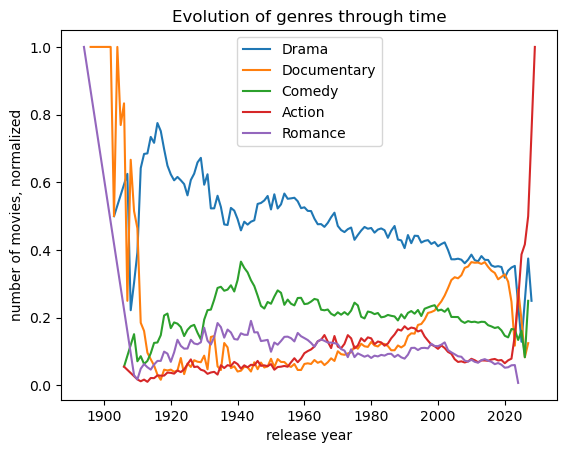

In [105]:
for genre in top_genres:
    imdb_genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()